## Modular Sequence of Operations
While `edit.data` has the concept of `transforms`, operations to be applied to the data upon retrieval or at the users whim, they lack a sense of modularity, composability and reversability needed for data preparation of ML and other downstream tasks.

Enter `edit.pipeline`, it is built to provide a way to create pipelines, sequences of operations to be applied step by step upon data, and crucially, the ability for those steps to be reversed. Ideally, data should be able to be retrieved, been run through said operations, and the result then undone with the same pipeline, appearing as if no operations had been done it at all.

In [1]:
import edit.pipeline

The construction of these pipelines can be quite complex, so it is best to take an iterative approach, slowly adding more steps and checking the output to ensure it is what you expect it to be. 

`edit.pipeline` consists of by default the basic blocks to prepare data, and should be enough for most cases. But can be easily extended to add additonal features

As `edit` is an ecosystem of tools, `edit.pipeline` builds heavily on `edit.data`. Most critically, it expects `edit.data.Indexes` as the sources of data.

The crucial class for `edit.pipeline` is `Pipeline`. It is the controller of the operations, handling retrieval, iterating and much more.

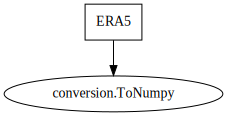

In [2]:
sample = edit.pipeline.Pipeline.sample()
sample

Here is a basic pipeline, consisting of only two steps, the root `edit.data.Index` of `ERA5`, and a conversion from `xarray` to `numpy`.

Just like an `edit.data.Index` this can be indexed, but the operations will be applied in sequential order.

In [3]:
sample['2000-01-01T00']

array([[[[264.69238383, 264.69238383, 264.69238383, ..., 264.69238383,
          264.69238383, 264.69238383],
         [265.4507953 , 265.4507953 , 265.44750501, ..., 265.45244044,
          265.45244044, 265.45244044],
         [265.80779158, 265.80614644, 265.80450129, ..., 265.81272702,
          265.81108187, 265.80943673],
         ...,
         [242.63429067, 242.63758096, 242.64087125, ..., 242.62277466,
          242.62606495, 242.62935524],
         [243.04722186, 243.05051215, 243.05215729, ..., 243.04228643,
          243.04393157, 243.04557671],
         [243.44041132, 243.44041132, 243.44041132, ..., 243.44041132,
          243.44041132, 243.44041132]]]])

See, we now have a `numpy` array directly from the `ERA5` index.

As mentioned above, `undo` is an important part of `edit.pipeline`

In [4]:
sample.undo(sample['2000-01-01T00'])

<xarray.Dataset> Size: 8MB
Dimensions:    (time: 1, latitude: 721, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 8B 2000-01-01
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB -180.0 -179.8 -179.5 ... 179.5 179.8
Data variables:
    2t         (time, latitude, longitude) float64 8MB 264.7 264.7 ... 243.4
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 21:47:55 UTC+1000 by era5_replication_tools-1.2....
    license:      Licence to use Copernicus Products: https://apps.ecmwf.int/...
    summary:      ERA5 is the fifth generation ECMWF atmospheric reanalysis o...
    title:        ERA5 single-levels reanalysis 2m_temperature 20000101-20000131

And thus the data has been fully converted back into its original form.